In [7]:
#%pip install pyampute missingno

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<b>Dataset Requirements:
- Publicly available
- 2 to 3 variables with high missing values
- Suitable for exploratory data analysis
</b>

In [9]:
df = pd.read_csv("./NHANES.csv")

In [10]:
df.shape

(5735, 28)

In [11]:
df.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


In [12]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

### Choose relevant features

In [15]:
rename_map = {
    "ALQ110":  "alcohol_12plus_lifetime",
    "ALQ130":  "alcohol_avg_drinks_12mo",
    "HIQ210":  "no_insurance_time_past_year",
    "RIDAGEYR":"age_years",
    "RIAGENDR":"sex",
    "RIDRETH1":"race_ethnicity",
    "BMXBMI":  "bmi",
    "INDFMPIR":"poverty_income_ratio",
    "ALQ101":  "alcohol_12plus_past_year"
}

df = df.rename(columns=rename_map)

use_cols = ["SEQN",
            "age_years","sex","race_ethnicity","bmi","poverty_income_ratio",
            "alcohol_12plus_lifetime", "alcohol_12plus_past_year", "alcohol_avg_drinks_12mo",
            "no_insurance_time_past_year"]

df_sub = df[use_cols].copy()

In [16]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         5735 non-null   int64  
 1   age_years                    5735 non-null   int64  
 2   sex                          5735 non-null   int64  
 3   race_ethnicity               5735 non-null   int64  
 4   bmi                          5662 non-null   float64
 5   poverty_income_ratio         5134 non-null   float64
 6   alcohol_12plus_lifetime      1731 non-null   float64
 7   alcohol_12plus_past_year     5208 non-null   float64
 8   alcohol_avg_drinks_12mo      3379 non-null   float64
 9   no_insurance_time_past_year  4732 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 448.2 KB


In [17]:
df_sub.isnull().sum()

SEQN                              0
age_years                         0
sex                               0
race_ethnicity                    0
bmi                              73
poverty_income_ratio            601
alcohol_12plus_lifetime        4004
alcohol_12plus_past_year        527
alcohol_avg_drinks_12mo        2356
no_insurance_time_past_year    1003
dtype: int64

# Missing Value Visualization

alcohol_12plus_lifetime        69.8
alcohol_avg_drinks_12mo        41.1
no_insurance_time_past_year    17.5
poverty_income_ratio           10.5
alcohol_12plus_past_year        9.2
bmi                             1.3
SEQN                            0.0
age_years                       0.0
sex                             0.0
race_ethnicity                  0.0
dtype: float64


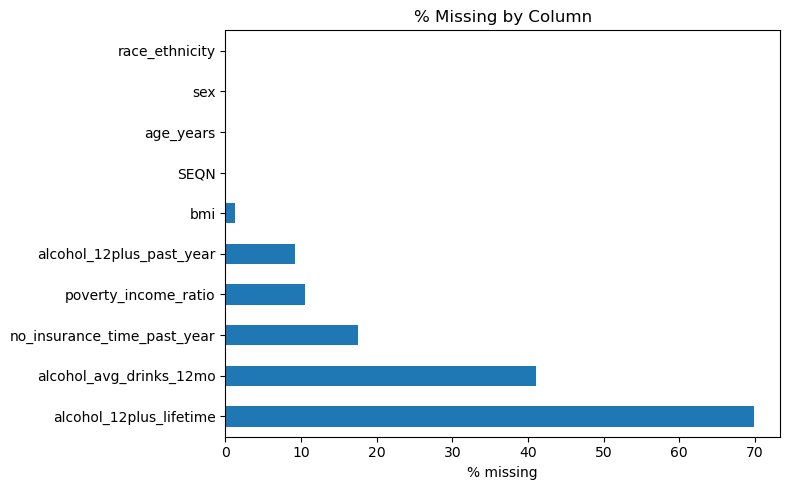

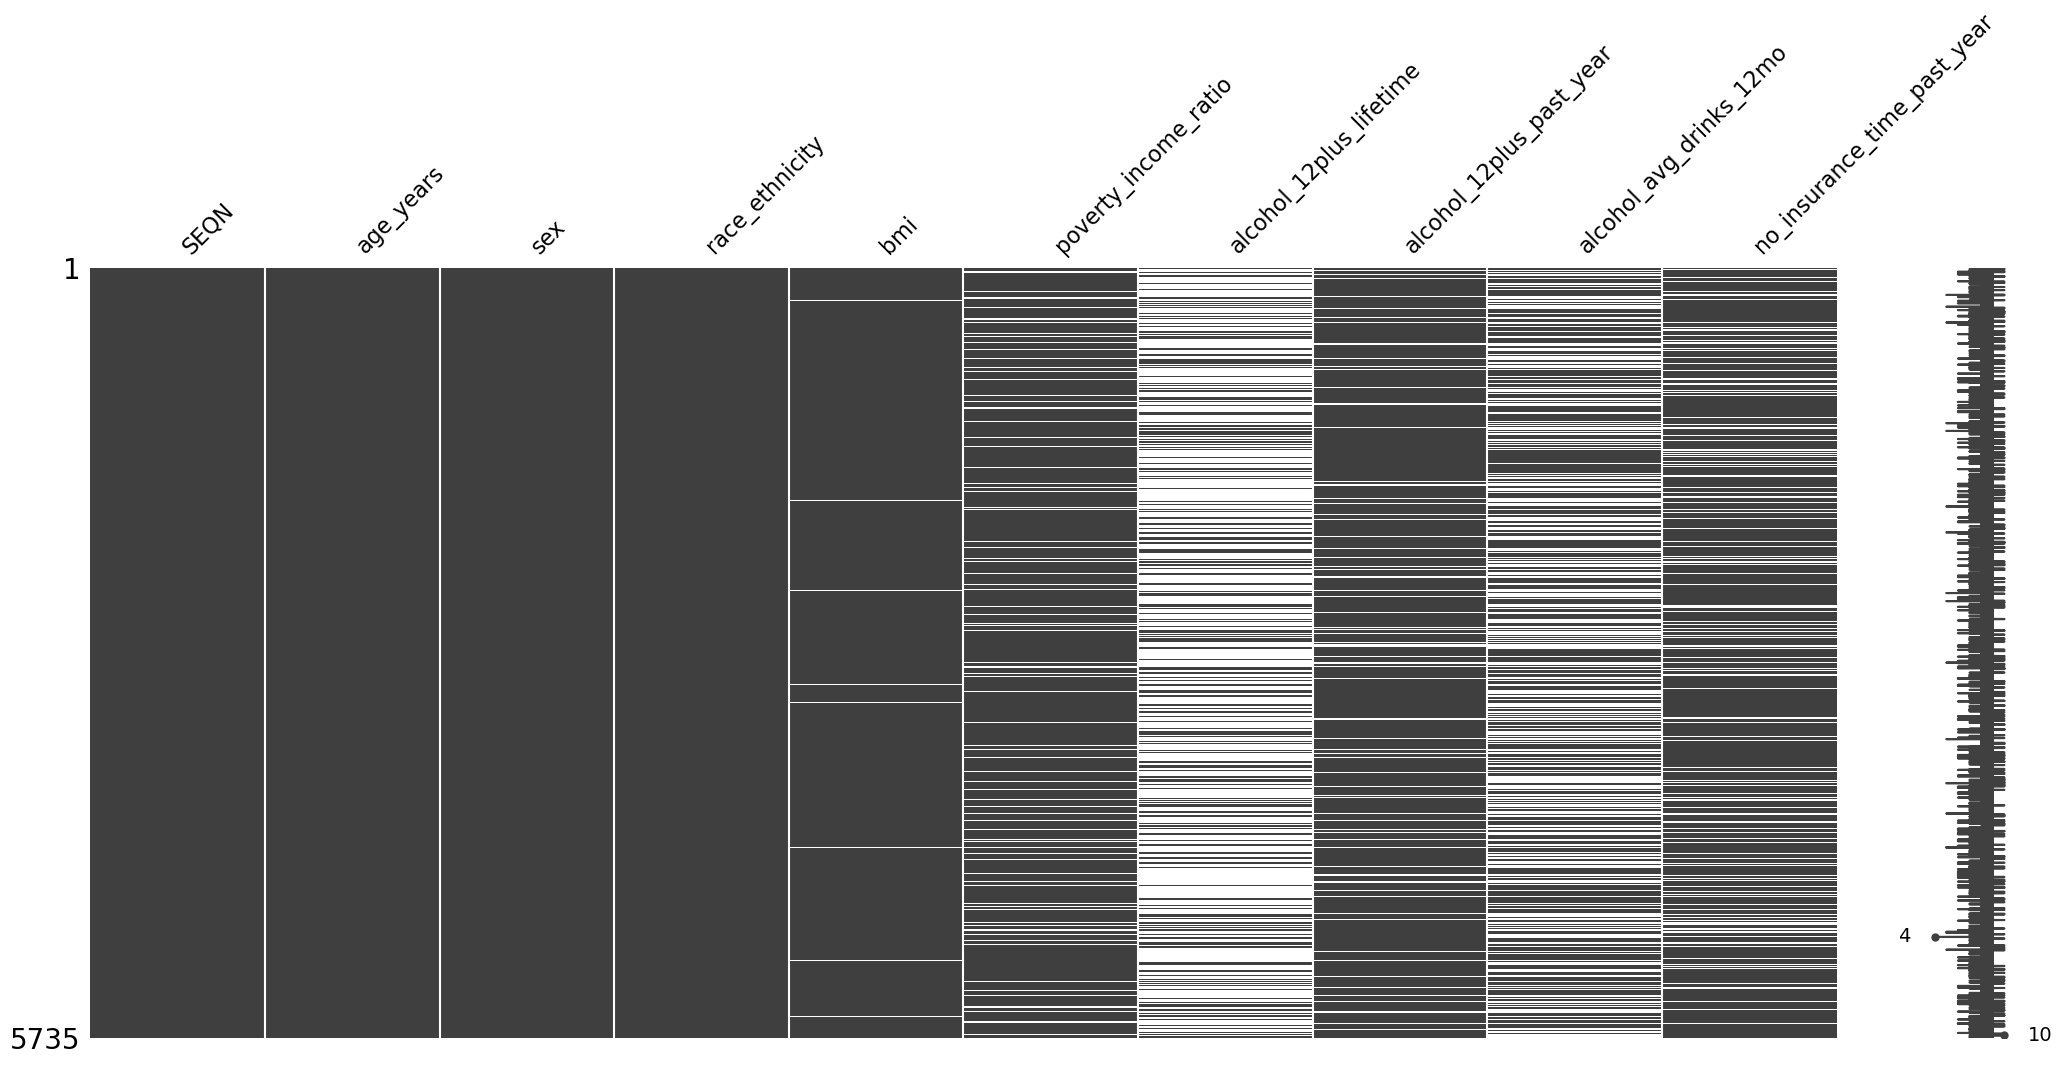

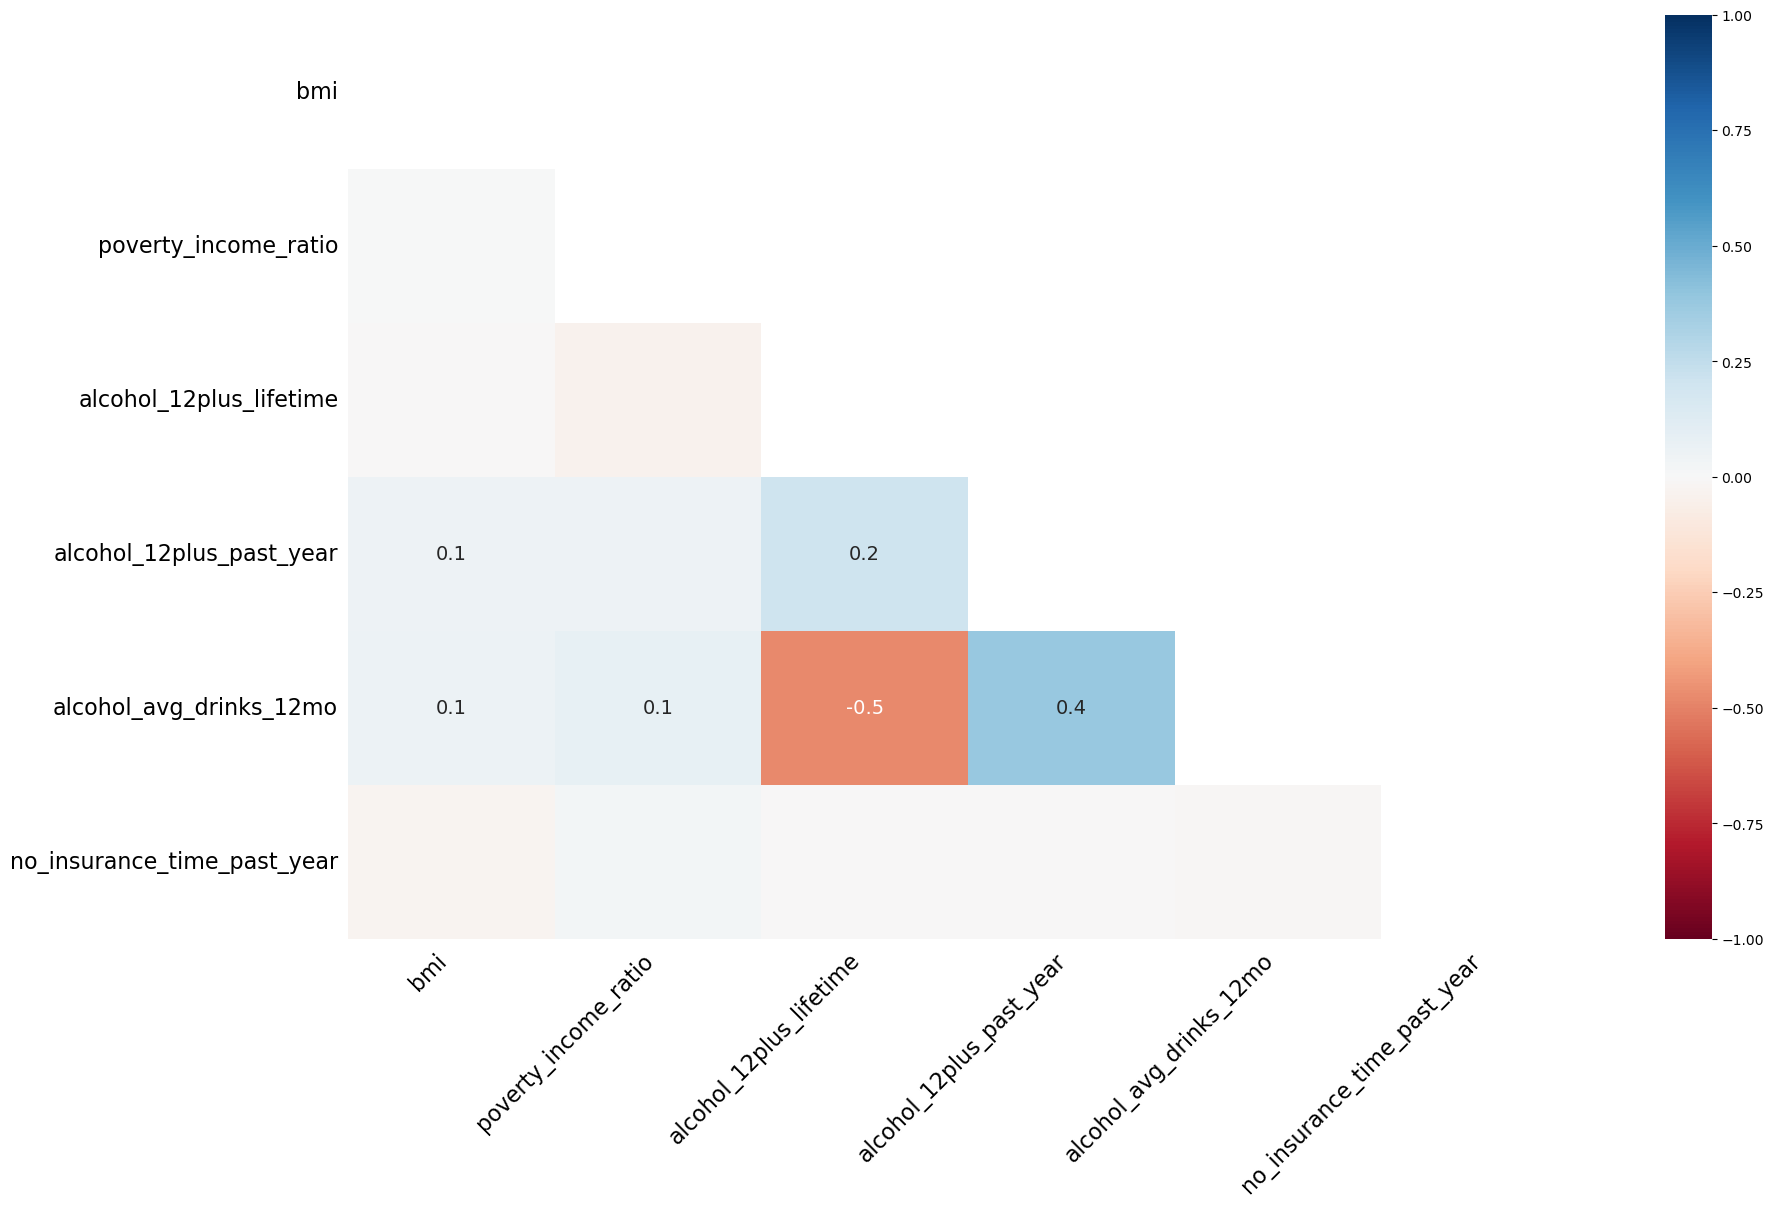

In [18]:
import missingno as msno

miss_pct = df_sub.isna().mean().sort_values(ascending=False) * 100
print(miss_pct.round(1))

ax = miss_pct.plot.barh(figsize=(8,5), title="% Missing by Column")
ax.set_xlabel("% missing"); plt.tight_layout(); plt.show()

msno.matrix(df_sub)
plt.show()

msno.heatmap(df_sub)
plt.show()

# Testing Hypothesis

In [19]:
from pyampute.exploration.mcar_statistical_tests import MCARTest
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

In [20]:
test_cols = ["age_years","bmi","poverty_income_ratio",
             "alcohol_12plus_lifetime","alcohol_avg_drinks_12mo","no_insurance_time_past_year"]
df_mcar = df_sub[test_cols].copy()

mt = MCARTest(method="little")
p_value = mt.little_mcar_test(df_mcar)
print(f"Little's MCAR test p-value: {p_value:.4g}")

Little's MCAR test p-value: 0


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

for v in ["alcohol_12plus_lifetime", "alcohol_avg_drinks_12mo", "no_insurance_time_past_year"]:
    df_sub[f"miss_{v}"] = df_sub[v].isna().astype(int)

X = df_sub[["age_years", "sex", "race_ethnicity", "bmi", "poverty_income_ratio", "alcohol_12plus_past_year"]]

cat = ["sex", "race_ethnicity", "alcohol_12plus_past_year"]
num = ["age_years", "bmi", "poverty_income_ratio"]

pre = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat),
    ("num", SimpleImputer(strategy="mean"), num)
])

In [22]:
def fit_missingness_model(target):
    y = df_sub[target]
    pipe = Pipeline([
        ("pre", pre),
        ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))
    ])
    pipe.fit(X, y)
    return pipe

m_alq110 = fit_missingness_model("miss_alcohol_12plus_lifetime")
m_alq130 = fit_missingness_model("miss_alcohol_avg_drinks_12mo")
m_hiq210 = fit_missingness_model("miss_no_insurance_time_past_year")

print("Fitted missingness models.")
print("Inspect coefficients via: m_alq110.named_steps['clf'].coef_")

Fitted missingness models.
Inspect coefficients via: m_alq110.named_steps['clf'].coef_


# Maximum Likelihood Estimation based imputation

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import BayesianRidge

df_imp = df_sub.copy()

cont_cols = ["bmi","poverty_income_ratio","alcohol_avg_drinks_12mo"]
cat_cols  = ["alcohol_12plus_lifetime","no_insurance_time_past_year"]

imp_cat = SimpleImputer(strategy="most_frequent")
df_imp[cat_cols] = imp_cat.fit_transform(df_imp[cat_cols])

iter_imp = IterativeImputer(estimator=BayesianRidge(), max_iter=25, random_state=42, sample_posterior=False)
df_imp[cont_cols] = iter_imp.fit_transform(df_imp[cont_cols])

df_imp.to_csv("./NHANES_2015_2016_tidy_imputed.csv", index=False)
print("Imputed file written: NHANES_2015_2016_tidy_imputed.csv")

Imputed file written: NHANES_2015_2016_tidy_imputed.csv


In [24]:
df_imp.isnull().sum()

SEQN                                  0
age_years                             0
sex                                   0
race_ethnicity                        0
bmi                                   0
poverty_income_ratio                  0
alcohol_12plus_lifetime               0
alcohol_12plus_past_year            527
alcohol_avg_drinks_12mo               0
no_insurance_time_past_year           0
miss_alcohol_12plus_lifetime          0
miss_alcohol_avg_drinks_12mo          0
miss_no_insurance_time_past_year      0
dtype: int64

Strengths of MLE on NHANES dataset

Handles complex distributions – MLE can flexibly estimate parameters for different variable types (continuous labs, categorical demographics).

Interpretable estimates – Coefficients have clear probabilistic meaning, making results easier to explain in a public health context.

Consistency with large samples – NHANES has a large sample size, so MLE tends to give reliable and stable estimates.

<br>

Limitations of MLE on NHANES dataset

Sensitive to missing data – If missingness is not random, MLE estimates may be biased.

Assumption-heavy – MLE relies on correct model specification; misspecification can lead to misleading results.

Computational challenges – With many predictors and categorical expansions, fitting can become slow or unstable.